# Проверка гипотез для увеличения выручки


*Вместе с отделом маркетинга крупного интернет-магазина был подготовлен список гипотез для увеличения выручки. Нам необходимо приоритизировать гипотезы, провести A/B-тест и проанализировать результаты.*

## Этапы исследования:

***1. Откроем файлы с данными, изучим общую информацию и подготовим данные***

Путь к файлам:

/datasets/hypothesis.csv
/datasets/orders.csv
/datasets/visitors.csv

***2. Проведем приоритизацию гипотез***

В файле /datasets/hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

- Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета;
- Применим фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета;
- Укажем, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясним, почему так произошло.

***3. Анализ A/B-теста***

Мы провели A/B-тест и получили результаты, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv. Проанализируем A/B-тест:

- Построим график кумулятивной выручки по группам. Сделаем выводы и предположения;
- Построим график кумулятивного среднего чека по группам. Сделаем выводы и предположения;
- Построим график относительного изменения кумулятивного среднего чека группы B к группе A. Сделаем выводы и предположения;
- Построим график кумулятивной конверсии по группам. Сделаем выводы и предположения;
- Построим график относительного изменения кумулятивной конверсии группы B к группе A. Сделаем выводы и предположения;
- Построим точечный график количества заказов по пользователям. Сделаем выводы и предположения;
- Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей;
- Построим точечный график стоимостей заказов. Сделаем выводы и предположения;
- Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных заказов;
- Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным. Сделаем выводы и предположения;
- Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделаем выводы и предположения;
- Посчитаем статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделаем выводы и предположения;
- Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделаем выводы и предположения;

Примем решение по результатам теста и объясним его. 
Варианты решений: 
1. Остановить тест, зафиксировать победу одной из групп. 
2. Остановить тест, зафиксировать отсутствие различий между группами. 
3. Продолжить тест.

***4. Общий вывод***

## Описание данных

***Файл /datasets/hypothesis.csv (гипотезы по увеличению выручки интернет-магазина):***

- Hypothesis — краткое описание гипотезы
- Reach — охват пользователей по 10-балльной шкале
- Impact — влияние на пользователей по 10-балльной шкале
- Confidence — уверенность в гипотезе по 10-балльной шкале
- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы

***Файл /datasets/orders.csv (результаты A/B-теста):***

- transactionId — идентификатор заказа
- visitorId — идентификатор пользователя, совершившего заказ
- date — дата, когда был совершён заказ
- revenue — выручка заказа
- group — группа A/B-теста, в которую попал заказ

***Файл /datasets/visitors.csv (результаты A/B-теста):***

- date — дата
- group — группа A/B-теста
- visitors — количество пользователей в указанную дату в указанной группе A/B-теста

***Загрузка данных и подготовка их к анализу***

Загрузим данные в переменные. Путь к файлам:

/datasets/hypothesis.csv.
/datasets/orders.csv.
/datasets/visitors.csv.

### Откроем файлы с данными, изучим общую информацию и подготовим данные

In [1]:
# импорт необходимых библиотек
import pandas as pd
import datetime as dt
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from pandas.plotting import register_matplotlib_converters
import warnings
import scipy.stats as stats

In [2]:
#читаем файлы и сохраняем их в переменные

try:
    hypothesis = pd.read_csv('hypothesis.csv')
except:
    hypothesis = pd.read_csv('https://code.s3.yandex.net/datasets/hypothesis.csv')
try:
    orders = pd.read_csv('orders.csv')
except:
    orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders.csv')
try:
    visitors = pd.read_csv('visitors.csv')
except:
    visitors = pd.read_csv('https://code.s3.yandex.net/datasets/visitors.csv')

In [3]:
# напишем функцию для обзора данных
def df_review(df):
    display(df.head())
    print('---------------------------------------------------------------------------------------------------------')
    print(df.info())
    print('---------------------------------------------------------------------------------------------------------')
    print(df.describe())
    print('---------------------------------------------------------------------------------------------------------')
    print(df.isna().sum())
    print('---------------------------------------------------------------------------------------------------------')
    print(df.duplicated().sum())

In [4]:
df_review(hypothesis)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1


---------------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes
None
---------------------------------------------------------------------------------------------------------
           Reach     Impact  Confidence    Efforts
count   9.000000   9.000000    9.000000   9.000000
mean    4.777778   4.777778    5.555556   4.888889
std     3.153481   3.192874    3.045944   2.803767
min     1.000000   1.000000    1.000000   1.000000
25%     3.000000   3.000000    3.000000   3.000000
50%     3.000000   3.000000    7.000000   

In [5]:
df_review(orders)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


---------------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
None
---------------------------------------------------------------------------------------------------------
       transactionId     visitorId       revenue
count   1.197000e+03  1.197000e+03  1.197000e+03
mean    2.155621e+09  2.165960e+09  8.348006e+03
std     1.229085e+09  1.236014e+09  3.919113e+04
min     1.062393e+06  5.114589e+06  5.000000e+01
25%     1.166776e+09  1.111826e+09  1.220000e+03
50%     2.145194e+09  2.217985e

In [6]:
df_review(visitors)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


---------------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
None
---------------------------------------------------------------------------------------------------------
         visitors
count   62.000000
mean   607.290323
std    114.400560
min    361.000000
25%    534.000000
50%    624.500000
75%    710.500000
max    770.000000
---------------------------------------------------------------------------------------------------------
date        0
group       0
visitors    0
dtype: int64
---------------------------------------------------------------------------------------------------------
0


***Вывод: Прочитали файлы и сохранили в соответствующие переменные. Нужно привести названия столбцов к нижнем регистру. Также, необходимо поменять тип данных в столбцах, где указана дата. Пропусков не обнаружено. Дубликаты отсутствуют.***

In [7]:
# создадим список с датасетами
all_data = [hypothesis, orders, visitors]

In [8]:
# Приведем названия столбцов к нижнему регистру и заменим пробелы нижним подчеркиванием
for data in all_data:
    data.columns = [x.lower().replace(' ', '_') for x in data.columns.values]

In [9]:
# выведем рандомные 5 строк
display(hypothesis.sample(5))
display(orders.sample(5))
display(visitors.sample(5))

,hypothesis,reach,impact,confidence,efforts
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8


,transactionid,visitorid,date,revenue,group
980,3759220283,3116161138,2019-08-22,190,A
614,1172658283,671625855,2019-08-07,11990,B
633,4077952433,178249104,2019-08-20,16950,A
813,1605437540,3012531415,2019-08-21,6242,A
731,3568733367,1206072200,2019-08-30,2590,B


,date,group,visitors
51,2019-08-21,B,656
47,2019-08-17,B,421
40,2019-08-10,B,369
20,2019-08-21,A,646
4,2019-08-05,A,756


In [10]:
orders = orders.rename(columns={'transactionid': 'transaction_id', 'visitorid': 'visitor_id'}) 

In [11]:
orders.head()

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [12]:
# изменение типа данных в столбцах с датами в orders and visitors
orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = pd.to_datetime(visitors['date'])

# проверка
print(orders['date'].dtypes)
print(visitors['date'].dtypes)

datetime64[ns]
datetime64[ns]


***Вывод: Заменили названия столбцов, привели их к нижнему регистру. Привели к правильному типу данные в столбцах, содержащих информацию о дате и времени.***

## Приоритизация гипотез

1. Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета;
2. Применим фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета;
3. Укажем, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясним, почему так произошло.

In [13]:
# создаем новый столбец ice и отсортируем по убыванию приоритета
hypothesis['ice'] = round((hypothesis['impact'] * hypothesis['confidence'])/hypothesis['efforts'], 3)
display(hypothesis[['hypothesis', 'ice']].sort_values(by='ice', ascending=False))

,hypothesis,ice
8,"Запустить акцию, дающую скидку на товар в день...",16.200
0,"Добавить два новых канала привлечения трафика,...",13.333
7,Добавить форму подписки на все основные страни...,11.200
6,Показать на главной странице баннеры с актуаль...,8.000
2,Добавить блоки рекомендаций товаров на сайт ин...,7.000
1,"Запустить собственную службу доставки, что сок...",2.000
5,"Добавить страницу отзывов клиентов о магазине,...",1.333
3,"Изменить структура категорий, что увеличит кон...",1.125
4,"Изменить цвет фона главной страницы, чтобы уве...",1.000


***Вывод: наиболее приоритетные гипотезы по ICE***
- Запустить акцию, дающую скидку на товар в день рождения
- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
    

In [14]:
# # создаем новый столбец rice и отсортируем по убыванию приоритета
hypothesis['rice'] = round((hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'])/hypothesis['efforts'], 3)
display(hypothesis[['hypothesis', 'rice']].sort_values(by='rice', ascending=False))

,hypothesis,rice
7,Добавить форму подписки на все основные страни...,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,56.0
0,"Добавить два новых канала привлечения трафика,...",40.0
6,Показать на главной странице баннеры с актуаль...,40.0
8,"Запустить акцию, дающую скидку на товар в день...",16.2
3,"Изменить структура категорий, что увеличит кон...",9.0
1,"Запустить собственную службу доставки, что сок...",4.0
5,"Добавить страницу отзывов клиентов о магазине,...",4.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3.0


***Вывод: наиболее приоритетные гипотезы по RICE***
    
- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
- Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа
- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей

***Вывод: Наболее перспективная гипотеза по ICE под номером 8 оказалась на пятом месте при расчете RICE. Это объясняется показателем reach - количество пользователей, которое затронет изменение. Этот показатель также оказал влияние и на другие гипотезы;
Тем не менее, учитывая результаты обеих приоритизаций гипотез наиболее важными из них являются:***

- 7 - Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок;
- 0 - Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей;
- 6 - Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию.

## Анализ A/B-теста

- Построим график кумулятивной выручки по группам. Сделаем выводы и предположения;
- Построим график кумулятивного среднего чека по группам. Сделаем выводы и предположения;
- Построим график относительного изменения кумулятивного среднего чека группы B к группе A. Сделаем выводы и предположения;
- Построим график кумулятивной конверсии по группам. Сделаем выводы и предположения;
- Построим график относительного изменения кумулятивной конверсии группы B к группе A. Сделаем выводы и предположения;
- Построим точечный график количества заказов по пользователям. Сделаем выводы и предположения;
- Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей;
- Построим точечный график стоимостей заказов. Сделаем выводы и предположения;
- Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных заказов;
- Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным. Сделаем выводы и предположения;
- Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделаем выводы и предположения;
- Посчитаем статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделаем выводы и предположения;
- Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделаем выводы и предположения;

Примем решение по результатам теста и объясним его. 
Варианты решений: 
1. Остановить тест, зафиксировать победу одной из групп. 
2. Остановить тест, зафиксировать отсутствие различий между группами. 
3. Продолжить тест.

### График кумулятивной выручки по группам

In [15]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date', 'group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transaction_id': 'nunique',
            'visitor_id': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

# получаем агрегированные кумулятивные по дням данные о посетителях 
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

# объединяем кумулятивные данные в одной таблице
cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]

display(cumulativeData.head())

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


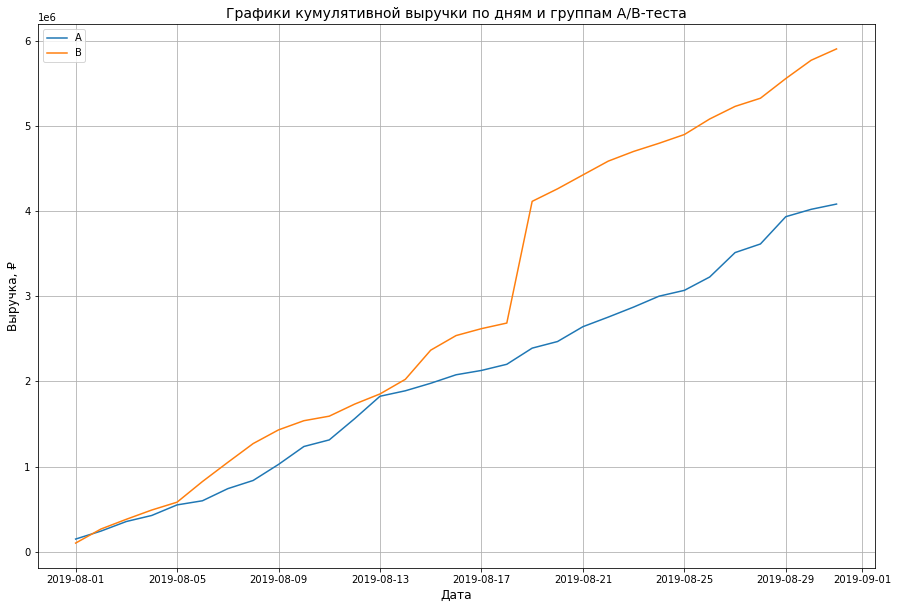

In [16]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulative_revenue_a = cumulativeData[cumulativeData['group']=='A'][['date', 'revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulative_revenue_b = cumulativeData[cumulativeData['group']=='B'][['date', 'revenue', 'orders']]

# задаём размер для графиков
plt.figure(figsize=(15, 10))

# строим график выручки группы А
plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue'], label='A')

# строим график выручки группы B
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue'], label='B')

plt.grid(visible=True)
plt.title('Графики кумулятивной выручки по дням и группам A/B-теста', fontsize=14)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Выручка, ₽', fontsize=12)
plt.legend() 
plt.show()

***Вывод: Выручка практически равномерно увеличивается в обеих группах за период теста. Можно заметить, что график выручки группы B в одной точке резко вырос. Это может дать сигнал о скачке числа заказов, либо о появлении очень дорогих заказов в выборке в этот конкретный период.***

### График кумулятивного среднего чека по группам.

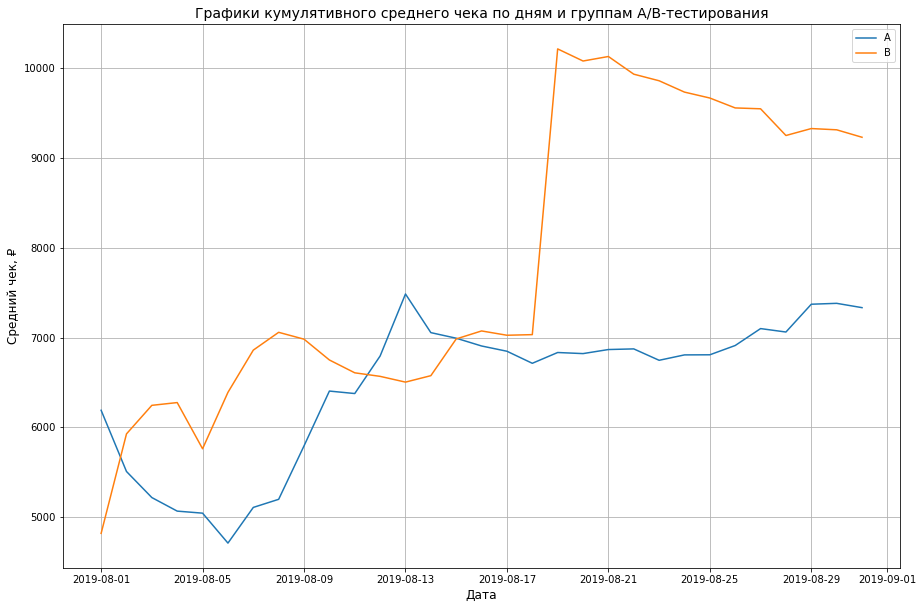

In [17]:
plt.figure(figsize=(15, 10))
plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue']/cumulative_revenue_a['orders'], label='A')
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue']/cumulative_revenue_b['orders'], label='B')

plt.grid(visible=True)
plt.title('Графики кумулятивного среднего чека по дням и группам A/B-тестирования', fontsize=14)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Средний чек, ₽', fontsize=12)
plt.legend() 
plt.show()

***Вывод: Группа А - средний чек после падения в начале и резкого скачка после, стабилизировался в значениях с тенденцией к росту. Группа В - средний чек в группе B в одной точке резко вырос, как и выручка. Далее видна тенденция к снижению среднего чека в этой группе. Величины среднего чека обеих групп разные.***

### График относительного изменения кумулятивного среднего чека группы B к группе A

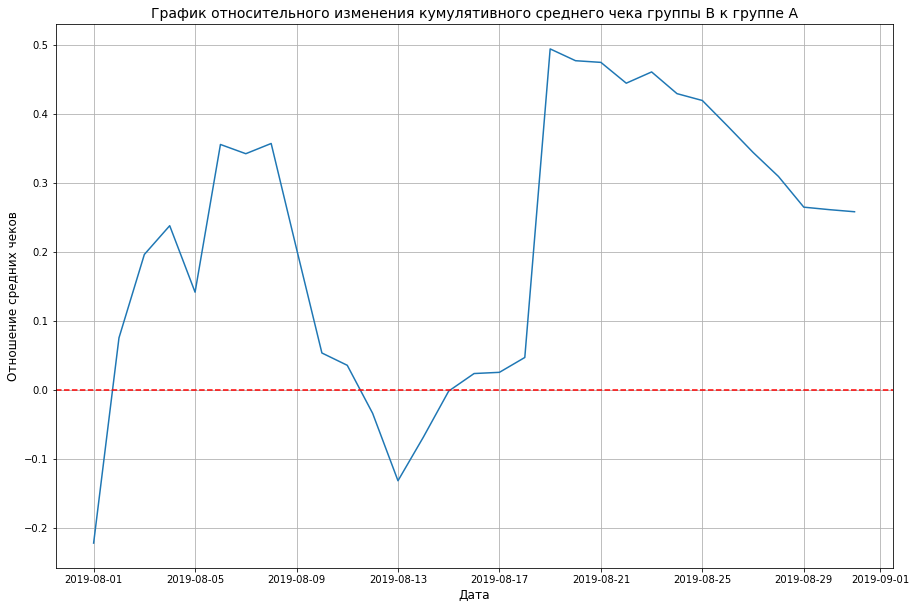

In [18]:
# собираем данные в одном датафрейме
merged_cumulative_revenue = cumulative_revenue_a.merge(
    cumulative_revenue_b,
    left_on='date',
    right_on='date',
    how='left',
    suffixes=['A', 'B'])

# задаём размер для графика
plt.figure(figsize=(15, 10))

# cтроим отношение средних чеков
plt.plot(merged_cumulative_revenue['date'],
         (merged_cumulative_revenue['revenueB']/
          merged_cumulative_revenue['ordersB'])/
         (merged_cumulative_revenue['revenueA']/
          merged_cumulative_revenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='red', linestyle='--')

plt.grid(visible=True)
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A', fontsize=14)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Отношение средних чеков', fontsize=12)
plt.show()

***Вывод: В некоторых точках виден резкий скачок на графике, это говорит о наличии крупных заказов.***

### Построим график кумулятивной конверсии по группам

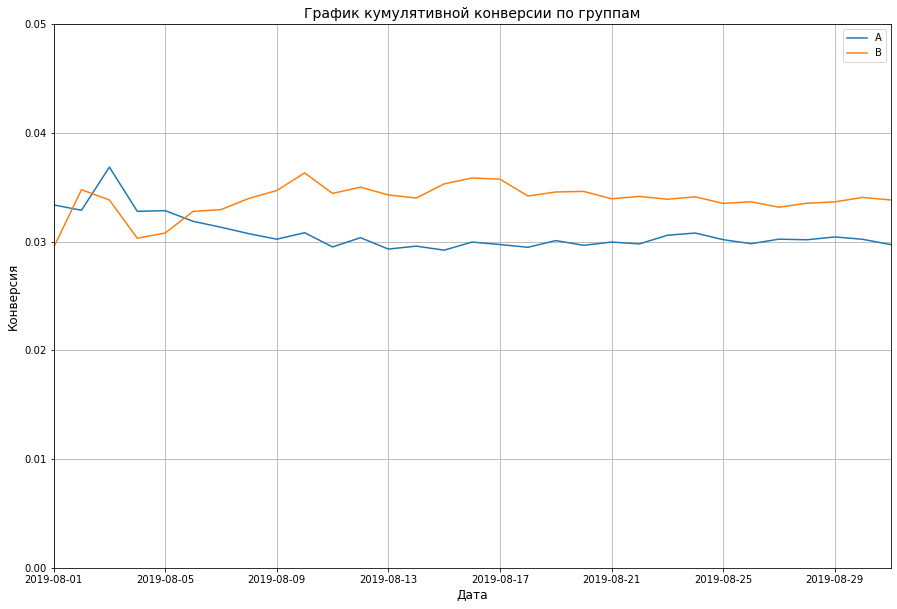

In [19]:
# конвертеры, которые позволяют использовать типы pandas в matplotlib  
register_matplotlib_converters()

# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulative_data_a = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulative_data_b = cumulativeData[cumulativeData['group']=='B']

# задаём размер для графиков
plt.figure(figsize=(15, 10))

# строим графики
plt.plot(cumulative_data_a['date'], cumulative_data_a['conversion'], label='A')
plt.plot(cumulative_data_b['date'], cumulative_data_b['conversion'], label='B')

# задаем масштаб осей
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 8, 31), 0, 0.05]) 

plt.grid(visible=True)
plt.title('График кумулятивной конверсии по группам', fontsize=14)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Конверсия', fontsize=12)
plt.legend()
plt.show()

***Вывод: Изначально группы колебались около одного значения конверсии, но затем конверсия группы B начала расти и далее зафиксировалась, а конверсия группы A просела относительно первоначальных значений и также зафиксировалась.***

### График относительного изменения кумулятивной конверсии группы B к группе A

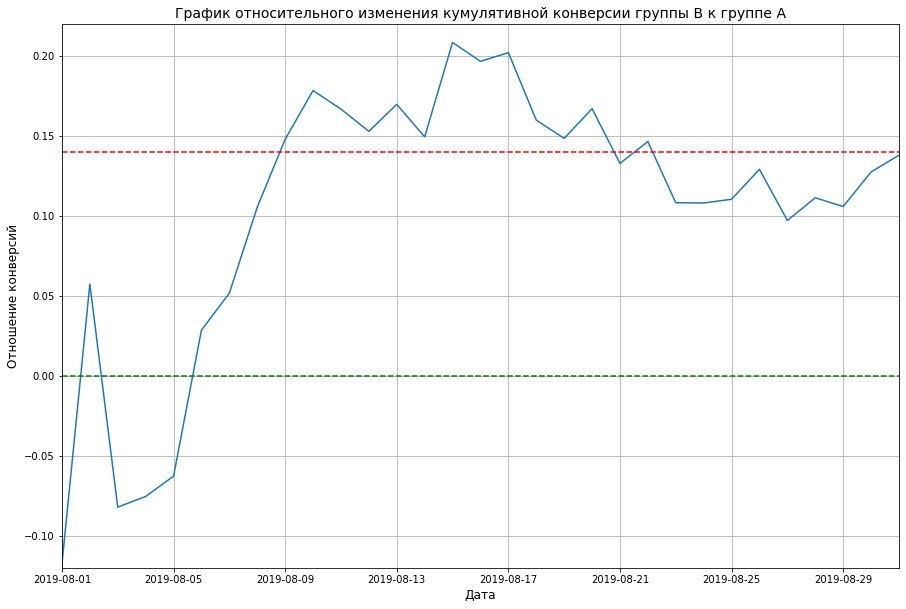

In [20]:
# джойним
merged_cumulative_conversions = cumulative_data_a[['date','conversion']].merge(
    cumulative_data_b[['date','conversion']],
    left_on='date',
    right_on='date',
    how='left',
    suffixes=['A', 'B'])

# задаём размер для графика
plt.figure(figsize=(15, 10))

# cтроим отношение конверсий
plt.plot(merged_cumulative_conversions['date'],
         merged_cumulative_conversions['conversionB']/
         merged_cumulative_conversions['conversionA']-1)

# добавляем оси X
plt.axhline(y=0, color='green', linestyle='--')
plt.axhline(y=0.14, color='red', linestyle='--')

# задаем масштаб осей
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 8, 31), -0.12, 0.22])

plt.grid(visible=True)
plt.title('График относительного изменения кумулятивной конверсии группы B к группе A', fontsize=14)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Отношение конверсий', fontsize=12)
plt.show()

***Вывод: В начале теста группа B проигрывала группе A, затем вырывается вперед и стабилизируется в районе 12-16 %.
На данный момент делать какие-либо выводы по тесту нельзя. Следующий шаг -  проанализировать аномалии, возможно, они внесут какую-то ясность в картину.***

### Точечный график количества заказов по пользователям

Создадим датафрейм orders_by_users, чтобы посмотреть число заказов по пользователям.

In [21]:
#orders.head()

In [22]:
# число заказов(транзакций) по пользователям
orders_by_users = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
    .sort_values(by='transaction_id', ascending=False)
    .rename(columns={'transaction_id': 'orders'})
)

display(orders_by_users.head(10))

,visitor_id,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


Можно заметить нескольких пользователей с большим количеством заказов.

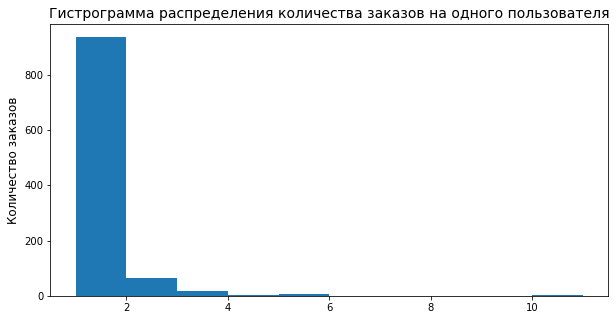

In [23]:
#строим гистограмму распределения заказов на одного пользователя

plt.figure(figsize=(10, 5))
plt.hist(orders_by_users['orders']) 
plt.title('Гистрограмма распределения количества заказов на одного пользователя', fontsize=14)
plt.ylabel('Количество заказов', fontsize=12)
plt.show()

***Вывод: по графику видно, что большая часть пользователей сделала только один заказ. Но также есть и пользователи, которые сделали и 10 заказов***.

Построим точечный график кол-ва заказов по пользователям

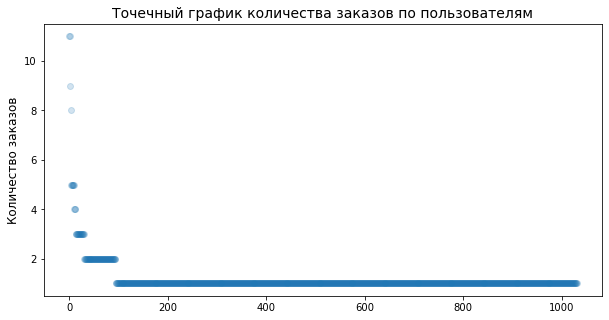

In [24]:
x_values = pd.Series(range(0,len(orders_by_users)))
plt.figure(figsize=(10, 5))
plt.scatter(x_values, orders_by_users['orders'], alpha=0.2)
plt.title('Точечный график количества заказов по пользователям', fontsize=14)
plt.ylabel('Количество заказов', fontsize=12)
plt.show()

***Вывод: Есть некоторое количество пользователей, кто сделал от 2-4 заказов. Брать эти заказы за аномалии или нет непонятно, т.к. их точная доля отсносительно остальных заказов не ясна.***

### Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей.

In [25]:
# Методом np.percentile('column', [percentile1, percentile2, percentile3]) находим перцентили
print(np.percentile(orders_by_users['orders'], [95, 99]))

[2. 4.]


***Вывод: Не более 1% пользователей совершало больше 4-х заказов и не больше 5% пользоваетелей совершали больше 2-х заказов. Выберем 4 заказа на пользователя как нижнюю границу, остальные будем считать аномалиями.***

### Построим точечный график стоимостей заказов

In [26]:
# посмотрим на топ-5 самых дорогих заказов по стоимости
display(orders.sort_values(by='revenue', ascending=False).head())

,transaction_id,visitor_id,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B
1196,3936777065,2108080724,2019-08-15,202740,B
858,192721366,1316129916,2019-08-27,93940,A
1136,666610489,1307669133,2019-08-13,92550,A
744,3668308183,888512513,2019-08-27,86620,B


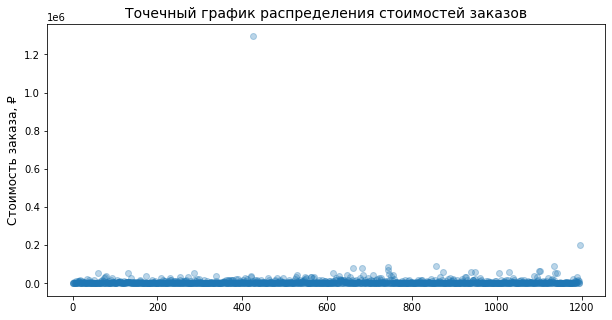

In [27]:
# строим точечный график стоимостей заказов
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(10, 5))
plt.scatter(x_values, orders['revenue'], alpha=0.3)
plt.title('Точечный график распределения стоимостей заказов', fontsize=14)
plt.ylabel('Стоимость заказа, ₽', fontsize=12)
plt.show()

По таком графику сложно что-то понять. Изменим масштаб.

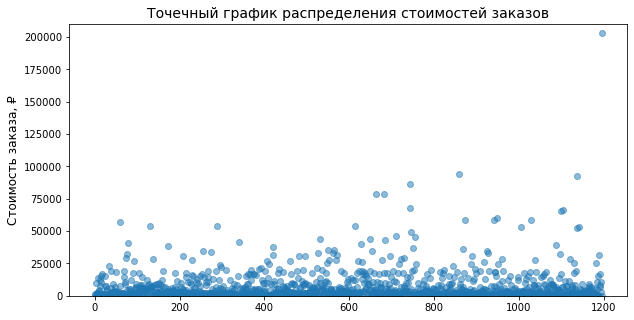

In [28]:
plt.figure(figsize=(10, 5))
plt.scatter(x_values, orders['revenue'], alpha=0.5)
plt.ylim(0, 210000)
plt.title('Точечный график распределения стоимостей заказов', fontsize=14)
plt.ylabel('Стоимость заказа, ₽', fontsize=12)
plt.show()

***Вывод: По графику можно заметить некоторое количество дорогих заказов. За границу аномальных заказов можно выбрать диапазон от 25 000 и 70 000 руб. Их точная доля не понятна — значит считать их аномалиями или нет мы пока не можем.***

### Расчет 95-й и 99-й перцентилей стоимости заказов. Выбор границы для определения аномальных пользователей

In [29]:
# Методом np.percentile('column', [percentile1, percentile2, percentile3]) находим перцентили
print(np.percentile(orders['revenue'], [95, 99]))

[28000.  58233.2]


***Вывод: Стоимость заказа в 28000 руб и более имеют не более 5% заказов, стоимость заказа в 58233 руб - не более 1%. За нижнюю границу можно выбрать стоимость заказа в 28000 и отсеять аномальные заказы по этой границе***

### Расчет статистической значимости различий в конверсии между группами по «сырым» данным.

***Сформулируем гипотезы:***

- ***H₀*** - различий в конверсии между группами нет,
- ***H₁*** - различия в конверсии между группами есть.

Для расчета статистической значимости различий в конверсии между группами нам необходимо подготовить имеющиеся данные. Сформируем новый датафрейм data со следующими столбцами:

- ***date*** - дата;
- ***orders_per_date_a*** - количество заказов в выбранную дату в группе A;
- ***revenue_per_date_a*** - суммарная выручка в выбранную дату в группе A;
- ***orders_per_date_b*** - количество заказов в выбранную дату в группе B;
- ***revenue_per_date_b*** - суммарная выручка в выбранную дату в группе B;
- ***orders_cummulative_a*** - суммарное число заказов до выбранной даты включительно в группе A;
- ***revenue_cummulative_a*** - суммарная выручка до выбранной даты включительно в группе A;
- ***orders_cummulative_b*** - суммарное число заказов до выбранной даты включительно в группе B;
- ***revenue_cummulative_b*** - суммарная выручка до выбранной даты включительно в группе B;
- ***visitors_per_date_a*** - количество пользователей в выбранную дату в группе A;
- ***visitors_cummulative_a*** - количество пользователей до выбранной даты включительно в группе A;
- ***visitors_per_date_b*** - количество пользователей в выбранную дату в группе B;
- ***visitors_cummulative_b*** - количество пользователей до выбранной даты включительно в группе B.

In [30]:
# расчет количества пользователей в выбранную дату в группе А
visitors_a_daily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitors_a_daily.columns = ['date', 'visitors_per_date_a']

# расчет количества пользователей до выбранной даты включительно в группе А
visitors_a_cummulative = visitors_a_daily.apply(
    lambda x: visitors_a_daily[visitors_a_daily['date'] <= x['date']].agg(
        {'date': 'max', 'visitors_per_date_a': 'sum'}
    ),
    axis=1,
)
visitors_a_cummulative.columns = ['date', 'visitors_cummulative_a']

# расчет количества пользователей в выбранную дату в группе В
visitors_b_daily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitors_b_daily.columns = ['date', 'visitors_per_date_b']

# расчет количества пользователей до выбранной даты включительно в группе В
visitors_b_cummulative = visitors_b_daily.apply(
    lambda x: visitors_b_daily[visitors_b_daily['date'] <= x['date']].agg(
        {'date': 'max', 'visitors_per_date_b': 'sum'}
    ),
    axis=1,
)
visitors_b_cummulative.columns = ['date', 'visitors_cummulative_b']

# расчет количества заказов и суммарной выручки в выбранную дату в группе A
orders_a_daily = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
orders_a_daily.columns = ['date', 'orders_per_date_a', 'revenue_per_date_a']

# расчет суммарного числа заказов до выбранной даты включительно в группе A
orders_a_cummulative = orders_a_daily.apply(
    lambda x: orders_a_daily[orders_a_daily['date'] <= x['date']].agg(
        {'date': 'max', 'orders_per_date_a': 'sum', 'revenue_per_date_a': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
orders_a_cummulative.columns = [
    'date',
    'orders_cummulative_a',
    'revenue_cummulative_a',
]

# расчет количества заказов и суммарной выручки в выбранную дату в группе В
orders_b_daily = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
orders_b_daily.columns = ['date', 'orders_per_date_b', 'revenue_per_date_b']

# расчет суммарного числа заказов до выбранной даты включительно в группе В
orders_b_cummulative = orders_b_daily.apply(
    lambda x: orders_b_daily[orders_b_daily['date'] <= x['date']].agg(
        {'date': 'max', 'orders_per_date_b': 'sum', 'revenue_per_date_b': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
orders_b_cummulative.columns = [
    'date',
    'orders_cummulative_b',
    'revenue_cummulative_b',
]

# объединение датафреймов в один общий
data = (
    orders_a_daily.merge(
        orders_b_daily, left_on='date', right_on='date', how='left'
    )
    .merge(orders_a_cummulative, left_on='date', right_on='date', how='left')
    .merge(orders_b_cummulative, left_on='date', right_on='date', how='left')
    .merge(visitors_a_daily, left_on='date', right_on='date', how='left')
    .merge(visitors_b_daily, left_on='date', right_on='date', how='left')
    .merge(visitors_a_cummulative, left_on='date', right_on='date', how='left')
    .merge(visitors_b_cummulative, left_on='date', right_on='date', how='left')
)

display(data.head())

,date,orders_per_date_a,revenue_per_date_a,orders_per_date_b,revenue_per_date_b,orders_cummulative_a,revenue_cummulative_a,orders_cummulative_b,revenue_cummulative_b,visitors_per_date_a,visitors_per_date_b,visitors_cummulative_a,visitors_cummulative_b
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


1. Создадим переменные orders_by_users_a и orders_by_users_b со столбцами ['visitor_id', 'orders']. В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов. 
2. Объявим переменные sample_a и sample_b, в которых пользователям с заказами будет соответствовать число заказов пользователя, а пользователям без заказов — нули. 
3. Посчитаем статистическую значимость различия конверсии по результатам месяца теста. 
4. Применим тест Манна-Уитни. 
5. Выведем p-value для сравнения конверсии между группами. 
6. Вычислим относительное различие в конверсии между группами.

In [31]:
# формирование датафреймов в которых указано число совершённых заказов
# для пользователей, которые заказывали хотя бы 1 раз
orders_by_users_a = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
orders_by_users_a.columns = ['visitor_id', 'orders']

orders_by_users_b = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
orders_by_users_b.columns = ['visitor_id', 'orders']

# формирование переменных в которых пользователям с заказами
# будет соответствовать число заказов пользователя,
# а пользователям без заказов — нули
sample_a = pd.concat([orders_by_users_a['orders'],
                      pd.Series(0, index=np.arange(
                          data['visitors_per_date_a'].sum() -
                          len(orders_by_users_a['orders'])), name='orders')], axis=0)

sample_b = pd.concat([orders_by_users_b['orders'],
                      pd.Series(0, index=np.arange(
                          data['visitors_per_date_b'].sum() -
                          len(orders_by_users_b['orders'])), name='orders')], axis=0)

# рассчет статистической значимости различия конверсии по результатам теста Манна-Уитни
print('p-value =', '{0:.3f}'.format(stats.mannwhitneyu(sample_a, sample_b)[1]))

# рассчет относительного различия в конверсии между группами
print('Относительное различие в средней конверсии между группами по «сырым» данным:',
      '{0:.3f}'.format(sample_b.mean() / sample_a.mean() - 1))


p-value = 0.017
Относительное различие в средней конверсии между группами по «сырым» данным: 0.138


***Вывод: p-value = 0.017, что меньше 0.05. Значит нулевую гипотезу об отсутствии различий по «сырым» данным в конверсии между группами можно отвергнуть.
Средняя конверсия группы В больше средней конверсии группы А.***

### Расчет статистической значимости различий в среднем чеке заказа между группами по «сырым» данным

Сформулируем гипотезы:

***H₀*** - различий в среднем чеке между группами нет;
***H₁*** - различия в среднем чеке между группами есть.

Чтобы рассчитать статистическую значимость различий в среднем чеке, передадим критерию mannwhitneyu() данные о выручке с заказов. Найдём относительные различия в среднем чеке между группами.

In [32]:
# рассчет статистической значимости различия среднего чека по результатам теста Манна-Уитни
print('p-value =', '{0:.3f}'.format(stats.mannwhitneyu(
    orders[orders['group']=='A']['revenue'],
    orders[orders['group']=='B']['revenue'])[1]))

# рассчет относительного различия в среднем чеке между группами
print('Относительное различие в среднем чеке между группами по «сырым» данным:',
      '{0:.3f}'.format(
          orders[orders['group']=='B']['revenue'].mean()/
          orders[orders['group']=='A']['revenue'].mean()-1)) 

p-value = 0.729
Относительное различие в среднем чеке между группами по «сырым» данным: 0.259


***Вывод: p-value = 0.729, что больше 0.05. Значит, что причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет.
Средний чек группы В сильно больше среднего чека группы А.***

### Посчитаем статистическую значимость различий в конверсии между группами по «очищенным» данным

Ранее мы нашли, что 95-й и 99-й перцентили средних чеков равны 28 000 и 58 233 рублям. А 95-й и 99-й перцентили количества заказов на одного пользователя равны 2 и 4 заказам на пользователя.

Возьмем за аномальных пользователей тех, кто совершил от 2 заказов или совершил заказ дороже 28 000 рублей и запишем это в переменных many_orders и expensive_orders. Тем самым мы уберём 5% пользователей с наибольшим числом заказов и от 1% до 5% пользователей с дорогими заказами. Сделаем срезы пользователей с числом заказов больше 2 — users_with_many_orders и пользователей, совершивших заказы дороже 28 000 — users_with_expensive_orders. Объединим их в таблице abnormal_users. А также узнаем, сколько всего аномальных пользователей методом shape().

In [33]:
many_orders = np.percentile(orders_by_users['orders'], 95)
expensive_orders = np.percentile(orders['revenue'], 95)
users_with_many_orders = pd.concat([
    orders_by_users_a[orders_by_users_a['orders'] > many_orders]['visitor_id'],
    orders_by_users_b[orders_by_users_b['orders'] > many_orders]['visitor_id']], axis=0)
users_with_expensive_orders = orders[orders['revenue'] > expensive_orders]['visitor_id']
abnormal_users = (pd.concat([
    users_with_many_orders,
    users_with_expensive_orders], axis=0)
                  .drop_duplicates()
                  .sort_values())

print(abnormal_users.head())
print('\n')
print('Количество аномальных пользователей:', abnormal_users.shape[0])

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
Name: visitor_id, dtype: int64


Количество аномальных пользователей: 74


***Вывод: Количество аномальных пользователей - 74. Нужно понять, как они повлияли на результаты теста. Посчитаем статистическую значимость различий в конверсии между группами теста по очищенным данным. Подготовим выборки количества заказов по пользователям по группам теста и применим статистический критерий Манна-Уитни к полученным выборкам.***

Гипотезы:

- H₀ - различий в конверсии между группами нет;
- H₁ - различия в конверсии между группами есть.

In [34]:
sample_a_filtered = pd.concat([
    orders_by_users_a[np.logical_not(
        orders_by_users_a['visitor_id']
        .isin(abnormal_users))]['orders'],
    pd.Series(0, index=np.arange(data['visitors_per_date_a'].sum() -
                                 len(orders_by_users_a['orders'])), name='orders')], axis=0)

sample_b_filtered = pd.concat([
    orders_by_users_b[np.logical_not(
        orders_by_users_b['visitor_id']
        .isin(abnormal_users))]['orders'],
    pd.Series(0, index=np.arange(data['visitors_per_date_b'].sum() -
                                 len(orders_by_users_b['orders'])), name='orders')], axis=0)

# рассчет статистической значимости различия конверсии по результатам теста Манна-Уитни
print('p-value =', '{0:.3f}'.format(stats.mannwhitneyu(sample_a_filtered, sample_b_filtered)[1]))

# рассчет относительного различия в конверсии между группами
print('Относительное различие в средней конверсии между группами по «очищенным» данным:',
      '{0:.3f}'.format(sample_b_filtered.mean()/sample_a_filtered.mean()-1))

p-value = 0.013
Относительное различие в средней конверсии между группами по «очищенным» данным: 0.173


***Вывод: p-value = 0.013, что меньше 0.05. Это означает, что нулевую гипотезу об отсутствии различий по «очищенным» данным в конверсии между группами можно отвергнуть. По «сырым» данным p-value был равен 0.017.
Средняя конверсия группы В больше средней конверсии группы А. Относительное различие в конверсии между группами по «сырым» данным было равно 0.138.
Результаты по «очищенным» данным незначительно отличаются от результатов по «сырым» данным.***

### Расчет статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным

Сформулируем гипотезы:

H₀ - различий в среднем чеке между группами нет;
H₁ - различия в среднем чеке между группами есть.

Передадим критерию mannwhitneyu() данные о выручке с заказов без учета аномальных пользователей и также найдём относительные различия в среднем чеке между группами.

In [35]:
print('p-value =',
      '{0:.3f}'.format(stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group'] == 'A',
        np.logical_not(orders['visitor_id']
                       .isin(abnormal_users)))]['revenue'], 
    orders[np.logical_and(
        orders['group'] == 'B',
        np.logical_not(orders['visitor_id']
                       .isin(abnormal_users)))]['revenue'])[1]))

print('Относительное различие в среднем чеке между группами по «очищенным» данным:',
      '{0:.3f}'.format(
    orders[np.logical_and(
        orders['group'] == 'B',
        np.logical_not(orders['visitor_id']
                       .isin(abnormal_users)))]['revenue'].mean() /
    orders[np.logical_and(
        orders['group'] == 'A',
        np.logical_not(orders['visitor_id']
                       .isin(abnormal_users)))]['revenue'].mean() - 1))

p-value = 0.738
Относительное различие в среднем чеке между группами по «очищенным» данным: -0.020


***Вывод: p-value = 0.738, что значительно больше 0.05. Это означает, что причин отвергать нулевую гипотезу и считать, что в среднем чеке по «очищенным» данным есть различия, нет. По «сырым» данным p-value был равен 0.729.
Однако по «очищенным» данным средний чек группы А больше среднего чека группы В. По «сырым» данным было наоборот, относительное различие в среднем чеке между группами составляло 0.259.***

# Общий вывод:

***Задачей исследования было:*** 
- приоритизировать гипотезы, 
- запустить A/B-тест, 
- проанализировать результаты.

***Для корретного анализа была вополнена предобработка данных:***

1. Замена названия столбцов, приведение их к нижнему регистру и правильному стилю;
2. Приведение к правильному типу данных в столбцах, содержащих информацию о дате и времени.

***В ходе приоритизирования гипотез по фреймворкам ICE и RICE удалось определить наиболее важные из них:***

- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок(гипотеза №7);
- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей(гипотеза №0);
- Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию(гипотеза №6).

***Основные положения анализа результатов A/B-теста:***

1. Кумулятивный средний чек группы В выше среднего чека группы А на 25.9% к концу теста;
2. Кумулятивная конверсия группы В выше конверсии группы А на 13.8% к концу теста;
3. Не более 5% от всех пользователей оформляли больше чем 2 заказа, 1% пользователей оформляли заказ более 4 раз;
4. Не более 5% от всех заказов имеют стоимость больше чем 28 000 рублей, 1% заказов - более 58 233 рублей;

5. ***Статистически значимое различие по конверсии между группами присутствует как по «сырым» данным, так и по данным после фильтрации аномалий***. Относительное различие в средней конверсии между группами (отношение средней конверсии группы В к средней конверсии группы А): 0.138 по «сырым» данным и 0.173 по «очищенным» данным;
6. ***Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий***. Относительное различие в среднем чеке между группами (отношение среднего чека группы В к среднему чеку группы А): 0.259 по «сырым» данным и -0.020 по «очищенным» данным;
7. График *различия конверсии между группами* сообщает, что ***результаты группы B лучше группы A и есть значительная тенденция к улучшению***.
8. График *различия среднего чека* говорит о том, что ***результаты группы B несмотря на попытки роста имеют некоторую тенденцию к снижению, сказалось в том числе влияние крупных заказов. По «очищенным» данным средний чек группы А оказался больше среднего чека группы В***.

***Итог: Исходя из обнаруженных фактов, тест следует продолжить. Конверсия сегмента B лучше сегмента A, однако, есть основания полагать, что пристутствует тенденция к снижению среднего чека сегмента В. Необходимо понаблюдать за этим показателем, соответственно нужно больше времени.***